# COGS 108 - Data Checkpoint

## Authors

- Hannah Yuan: Project administration, Data curation, Writing - original draft
- Sakura Nishikawa: Analysis, Software, Visualization
- Scarlett Wu: Methodology, Software, Writing - review & editing
- Tania Jain: Analysis, Visualization, Writing - original draft
- Tanya Bhat: Background Research, Software, Writing - review & editing

## Research Question

To what extent do early enrollment metrics—specifically seat fill rate during the first 72 hours of registration—predict the final relative maximum waitlist size (waitlist ÷ course capacity) for undergraduate courses at the University of California, San Diego between the 2022 and 2025 academic years?


## Background and Prior Work

At UC San Diego, course registration occurs through WebReg and is structured around priority enrollment windows tied to academic standing. Students receive two enrollment appointments (“first pass” and “second pass”), typically a week apart. During first pass, students may enroll in up to 11.5 units. During second pass, they may enroll (and waitlist) up to 19.5 units. This increases to 22 units once instruction begins. Waitlists are only available during second pass, and students may waitlist only one section per course. If a desired section is full, students must either choose another section or join the waitlist. These rules create a competitive, time-sensitive environment where students actively monitor seat availability and react to changes during registration. As a result, the enrollment process itself generates rich behavioral traces that reflect how students compete for limited seats over time. Accurate forecasting is also valuable for students, who must decide which courses to prioritize during first pass and which courses are realistically worth waitlisting.

Universities must forecast course demand each term to determine how many seats, sections, instructors, and classrooms to allocate. When demand is underestimated, courses rapidly fill and waitlists grow, forcing departments to add seats or deny access. When demand is overestimated, sections may run under-enrolled or be cancelled, disrupting schedules and wasting instructional resources. Because of these operational consequences, predicting course enrollment has become an important problem. Previous year course enrollment rates and waitlist counts are also valuable to students who are planning their schedules, as they can enroll in popular high-demand classes during first pass and save the rest for second pass. 

<a name="cite_ref-1"></a><sup>1</sup>
 Prior work applies machine learning techniques to predict final course enrollment using historical enrollment patterns, departmental trends, and course offering history. The study finds that historical enrollment data is the single strongest predictor of future course demand, outperforming other features such as course descriptions and scheduling patterns. However, the study focuses on historical signals available before enrollment begins, rather than examining whether early behavior during registration itself can serve as a predictive signal.

<a name="cite_ref-2"></a><sup>2</sup>
 Another paper shows that an automated time-series–based tool—especially using Gaussian Processes—can predict CSUN undergraduate computer science course enrollments within one class size for most courses when forecasting up to one academic year ahead, making it practically useful for departmental scheduling despite using only historical enrollment data. This result suggests that behavioral traces from prior terms carry substantial predictive power. Yet, these signals are also available only before registration begins and do not address whether information revealed during the early hours of enrollment can forecast later enrollment pressure.

<a name="cite_ref-3"></a><sup>3</sup>
 Prior research has also demonstrated that modeling enrollment as a time-varying process is critical for accurate demand forecasting. Pawar et al. apply time-series machine learning methods, including Long Short-Term Memory (LSTM) networks, to university course registration data and show that features derived from historical enrollment and registration trajectories are strongly predictive of future course demand. Their findings indicate that temporal enrollment dynamics capture demand signals that are not well represented by static course attributes alone. While their work focuses on semester-level forecasting rather than fine-grained registration behavior, it supports the broader conclusion that meaningful prediction requires modeling how enrollment evolves over time.

These works together show that course enrollment forecasting is an important problem for universities and their students, and that historical enrollment patterns provide useful signals for prediction. However, little prior work has examined whether the early, high-frequency behavioral signals that appear during the first hours of registration—such as rapid seat loss, waitlist growth, and enrollment rate—contain enough information to predict later enrollment pressure. This project addresses that gap by using detailed time-series enrollment data from UC San Diego to investigate whether patterns observed in the first 12 hours of registration can predict the final maximum waitlist size for a course offering.

1. <a name="cite_note-1"></a> [^](#cite_ref-1)Lee, Dianne. 2020. A Classy Affair: Modeling Course Enrollment Prediction. Bachelor’s thesis, Harvard College.
https://dash.harvard.edu/entities/publication/36459815-6238-4384-82b2-958b5a7b840a

2. <a name="cite_note-2"></a> [^](#cite_ref-2)Watkins,Kaplan. 2018. Modeling in R and Weka for Course Enrollment Prediction.
https://www.iaiai.org/journals/index.php/IJIRM/article/view/212

3. <a name="cite_note-3"></a> [^](#cite_ref-3) Pawar, P., Hatcher, S., Anthony, T., & Jololian, L. (2019). Demand forecasting using machine learning. IEEE.
https://ieeexplore.ieee.org/abstract/document/9020393

## Hypothesis


We hypothesize that courses with faster seat fill rates during the first 72 hours of registration will exhibit larger final relative maximum waitlist sizes at UC San Diego. Early registration activity serves as a signal of student demand, and when course capacity is limited, unmet demand persists and accumulates as a waitlist throughout the enrollment period.

## Data

### Data overview
- Dataset #1
  - Dataset Name: UCSD Historical Historical Enrollment Data (GitHub)
  - Link to the dataset: https://github.com/UCSD-Historical-Enrollment-Data/UCSDHistEnrollData/tree/master
  - Number of observations:  the final dataset includes 463 observations. There are 9 quarters worth of data for the Math and Cognitive Science departments each. Each quarter has 30-60 csv files for each class. These were combined and used to form our final dataset.
  - Number of variables: 12 (fill_rate_0to12h,	fill_rate_12to24h, fill_rate_24to36h,	fill_rate_36to48h,	fill_rate_48to60h, fill_rate_60to72h,	quarter, dept, subj_course_id, start_time, end_time, final_waitlist_count)
  - Description of the variables most relevant to this project:
    fill_rate_0to12h: Amount of seats filled in the first 12 hours
    fill_rate_12to24h: Amount of seats filled between 12 to 24 hours
    fill_rate_24to36h: Amount of seats filled between 24 to 36 hours
    fill_rate_36to48h: Amount of seats filled between 36 to 48 hours
    fill_rate_48to60h: Amount of seats filled between 48 to 60 hours
    fill_rate_60to72h:Amount of seats filled between 60 to 72 hours
    quarter: Quarter the data is from (Fa22, Fa23, Fa24, Wi23, Wi24, Wi25, Sp23, Sp24, Sp25)
    dept: This variable explains which department the class is from (math, cogs)
    subj_course_id: Class code that the data is from
    start_time: Time when the enrollment for that class opened
    end_time: Time when the enrollment for that class closed
    final_waitlist_count: The number of people on the waitlist once the quarter began
  - Descriptions of any shortcomings this dataset has with repsect to the project
    The dataset does not contain information regarding enrollment priority and course constraints (such as major restrictions and instructor reputation), which could potentially affect early enrollment and waitlist results. Also, the data is department and quarter specific, which could potentially limit the overall generalizability of the results to all UCSD courses.

In [78]:
# Run this code every time when you're actively developing modules in .py files.  It's not needed if you aren't making modules
#
## this code is necessary for making sure that any modules we load are updated here 
## when their source code .py files are modified

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
# Setup code -- this only needs to be run once after cloning the repo!
# this code downloads the data from its source to the `data/00-raw/` directory
# if the data hasn't updated you don't need to do this again!

# if you don't already have these packages (you should!) uncomment this line
# %pip install requests tqdm

import sys
sys.path.append('./modules') # this tells python where to look for modules to import

import get_data # this is where we get the function we need to download data

# replace the urls and filenames in this list with your actual datafiles
# yes you can use Google drive share links or whatever
# format is a list of dictionaries; 
# each dict has keys of 
#   'url' where the resource is located
#   'filename' for the local filename where it will be stored 
datafiles = [
    { 'url': 'https://drive.google.com/file/d/1XxRMEsB6uU-l9cD-CBLT13HvekhNRk7f/view?usp=drive_link', 'filename':'COGS 108 Enrollment CSV files.zip'}
]

get_data.get_raw(datafiles,destination_directory='data/00-raw/')

Overall Download Progress: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

Successfully downloaded: COGS 108 Enrollment CSV files.zip


### UCSD COGS/MATH Course Enrollment & Waitlist Dynamics

A. (fill_rate_0to12h (and subsequent 12hr time frames)): This metric represents the velocity of enrollment, measured in students per hour, averaged over a specific 12 hour frame starting from the course's enrollment opening time. For example, a value 10.0 would mean on average, 10 students enrolled every hour during that time frame. Higher values (e.g., >20) indicate high demand in courses that students rush to secure. Values near 0 indicate either the class was full or there was little interest during that time. Negative values would indicate students dropping the course, which is rare in the first 72 hours.(final_waitlist_count): The total number of students remaining on the official waitlist by the first day of instruction. A value of 0 indicated all interested students likely got in. (start_time): The exact timestamp when first pass enrollment officially opened for the quarter This is used as the "t=0" anchor for the fill-rate calculations. 
 
B. Although our goal was to focus on the departments with courses of our interest and high-demand, the enrollment behavior of COGS and MATH courses may not represent the university-wide courses. Also, since we specified the 12-hour time frame, if a course fills up completely in 5 minutes, our 0-12h metric will just show the high average, masking the extreme behavior. Additionally, since some courses let in most students on the waitlist within the first 2 weeks of instruction, the (final_waitlist_count) might not be the clearest indication of the end behavior, and could also discourage students to stay on the waitlist. 

C. We first downloaded raw course-level CSV files from the UCSD Historical Enrollment Data repository for selected quarters and departments (COGS and MATH). We inspected the key variables (time, enrolled, available, waitlisted, total) and standardized column names when necessary. Next, we cleaned the time field by detecting whether timestamps were recorded in Unix seconds, milliseconds, or ISO format and converted all values into a unified datetime format. After sorting records chronologically, we aggregated multiple sections into a single course-level time series by summing enrollment-related fields at each timestamp. Using the official enrollment start time for each quarter as an anchor, we observed course behavior over the first 72 hours after registration opened. This window was divided into six consecutive 12-hour bins, and we computed enrollment fill rates within each interval to capture early demand dynamics. Finally, we calculated each course’s final waitlist count on the first day of instruction at 6:00 AM., merged all features into one row per course offering, and exported the cleaned dataset for downstream modeling.

In [80]:
from pathlib import Path
import pandas as pd
import numpy as np

# ----------------------------
# 1) Robust time parsing
# ----------------------------
def parse_time_col(s: pd.Series) -> pd.Series:
    """
    Handles either:
      - numeric unix timestamps (seconds OR milliseconds)
      - string/ISO timestamps
    """
    if pd.api.types.is_numeric_dtype(s):
        med = float(pd.Series(s).dropna().median())
        unit = "ms" if med > 1e12 else "s"
        return pd.to_datetime(s, unit=unit, errors="coerce")
    return pd.to_datetime(s, errors="coerce")


# ----------------------------
# 2) Load all sections for a course-term
# ----------------------------
def load_course(quarter, course_id, base_path="data", dept="cogs"):
    """
    Loads all section CSVs for a given course in a given quarter
    and returns a section-level event-log dataframe.
    """

    df = pd.read_csv(f"{base_path}/{quarter}/{course_id}.csv")

    # standardize column names
    df = df.rename(columns={
        "waitlist": "waitlisted",
        "enrolled_ct": "enrolled"
    })

    # parse time robustly
    df["datetime"] = parse_time_col(df["time"])


    # attach identity
    df["course"] = course_id.replace("_", " ")
    df["dept"] = dept
    df["quarter"] = quarter


    return df


# ----------------------------
# 3) Aggregate sections -> course-level time series
# ----------------------------
def aggregate_to_course_ts(df_raw: pd.DataFrame) -> pd.DataFrame:
    """
    Sums enrolled/available/waitlisted/total across sections per timestamp.
    Returns a course-level time series.
    """
    required = {"quarter","dept","course","datetime","enrolled","available","waitlisted","total"}
    missing = required - set(df_raw.columns)
    if missing:
        raise ValueError(f"aggregate_to_course_ts missing columns: {missing}")

    course_ts = (
        df_raw
        .groupby(["quarter", "dept", "course", "datetime"], as_index=False)
        .agg({
            "enrolled": "sum",
            "available": "sum",
            "waitlisted": "sum",
            "total": "sum"
        })
        .sort_values("datetime")
        .reset_index(drop=True)
    )
    return course_ts


# ----------------------------
# 4) 12-hour bin fill rates (0-72h) from a fixed anchor time
# ----------------------------
def _prep_time(df):
    df = df.copy()
    df["datetime"] = pd.to_datetime(df["datetime"])
    return df.sort_values("datetime").reset_index(drop=True)

def _value_nearest(df, target_time, col):
    idx = (df["datetime"] - target_time).abs().idxmin()
    return float(df.loc[idx, col])

def fill_rates_by_12h_bins(course_ts: pd.DataFrame,
                           start_time="2022-05-20 08:00:00",
                           tz=None):
    df = _prep_time(course_ts)

    t0 = pd.to_datetime(start_time)
    if tz is not None:
        if df["datetime"].dt.tz is None:
            df["datetime"] = df["datetime"].dt.tz_localize(tz)
        if t0.tzinfo is None:
            t0 = t0.tz_localize(tz)

    t_end = t0 + pd.Timedelta(hours=72)

    # small buffer so nearest-matching works at edges
    window_df = df[
        (df["datetime"] >= t0 - pd.Timedelta(hours=2)) &
        (df["datetime"] <= t_end + pd.Timedelta(hours=2))
    ].copy()

    if len(window_df) < 2:
        return None

    boundaries = [t0 + pd.Timedelta(hours=h) for h in (0, 12, 24, 36, 48, 60, 72)]
    enrolled_at = [_value_nearest(window_df, t, "enrolled") for t in boundaries]

    rates = {}
    labels = [(0,12),(12,24),(24,36),(36,48),(48,60),(60,72)]
    for i, (a,b) in enumerate(labels):
        rates[f"fill_rate_{a}to{b}h"] = (enrolled_at[i+1] - enrolled_at[i]) / 12.0

    return rates


# ----------------------------
# 5) Build final dataset for a list of courses in a quarter
# ----------------------------
def value_at_time_nearest(df, target_time, col="waitlisted"):
    idx = (df["datetime"] - target_time).abs().idxmin()
    return float(df.loc[idx, col])

def build_dataset_for_courses(quarter, course_ids, base_path="data", dept="cogs",
                              start_time="2022-05-20 08:00:00",
                              end_date="2022-06-03",   # YYYY-MM-DD
                              end_hour=6,
                              tz=None):
    rows = []

    # construct end_time
    end_time = pd.to_datetime(f"{end_date} {end_hour:02d}:00:00")

    for course_id in course_ids:
        df_raw = load_course(quarter, course_id, base_path=base_path, dept=dept)
        course_ts = aggregate_to_course_ts(df_raw)

        if tz is not None:
            if course_ts["datetime"].dt.tz is None:
                course_ts["datetime"] = course_ts["datetime"].dt.tz_localize(tz)
            if end_time.tzinfo is None:
                end_time = end_time.tz_localize(tz)

        feats = fill_rates_by_12h_bins(course_ts, start_time=start_time, tz=tz)
        if feats is None:
            continue

        course_space = course_id.replace("_", " ").strip()
        feats["quarter"] = quarter
        feats["dept"] = dept
        feats["subj_course_id"] = course_space
        feats["start_time"] = start_time
        feats["end_time"] = str(end_time)

        feats["final_waitlist_count"] = value_at_time_nearest(course_ts, end_time, col="waitlisted")

        rows.append(feats)

    return pd.DataFrame(rows)


In [81]:
import os
import pandas as pd

# 1. Define Quarter Dates (Enrollment Start & Instruction Start)

quarter_dates = {
    "Fa22": ("2022-05-20 08:00:00", "2022-09-22"),
    "Wi23": ("2022-11-07 08:00:00", "2023-01-09"),
    "Sp23": ("2023-02-18 08:00:00", "2023-04-03"),
    "Fa23": ("2023-05-26 08:00:00", "2023-09-28"),
    "Wi24": ("2023-11-14 08:00:00", "2024-01-08"),
    "Sp24": ("2024-02-17 08:00:00", "2024-04-01"),
    "Fa24": ("2023-05-24 08:00:00", "2024-09-26"),
    "Wi25": ("2023-11-12 08:00:00", "2025-01-06"),
    "Sp25": ("2024-02-15 08:00:00", "2025-03-31"),

}

# 2. Automated Builder Loop
all_quarter_dfs = []

# Iterate through both departments
for dept in ["COGS", "MATH"]:
    dept_path = os.path.join("data", dept)

    # skip if folder doesn't exist
    if not os.path.exists(dept_path):
        print(f"Skipping {dept} (folder not found)")
        continue

    # Iterate through each quarter folder inside the department (e.g., Fa22, Wi23)
    for quarter in os.listdir(dept_path):

        quarter_path = os.path.join(dept_path, quarter)

        # Check if we have dates for this quarter
        if quarter not in quarter_dates:
            print(f"Skipping {quarter} (Dates not defined in quarter_dates dictionary)")
            continue

        start_time, end_date = quarter_dates[quarter]

        # Get list of course IDs from filenames (e.g., "COGS 1.csv" -> "COGS 1")
        # We assume files are named like "COGS 1.csv"
        files = [f for f in os.listdir(quarter_path) if f.endswith(".csv")]
        course_ids = [f.replace(".csv", "") for f in files]

        print(f"Processing {dept} {quarter}: {len(course_ids)} courses found...")

        # Run the build function for this specific batch
        try:
            df_batch = build_dataset_for_courses(
                quarter=quarter,
                course_ids=course_ids,
                base_path=dept_path,   # Points to data/COGS or data/MATH
                dept=dept.lower(),     # "cogs" or "math"
                start_time=start_time,
                end_date=end_date,
                end_hour=6,
                tz=None
            )
            all_quarter_dfs.append(df_batch)
        except Exception as e:
            print(f"  Error processing {dept} {quarter}: {e}")


# 3. Merge & Save
if all_quarter_dfs:
    final_df = pd.concat(all_quarter_dfs, ignore_index=True)

    # Save the giant dataset
    final_df.to_csv("data/00-raw/course_enrollment_data.csv", index=False)

    print(f"Total Observations: {len(final_df)}")
    display(final_df.head())
else:
    print("No data was generated.")

Processing COGS Wi25: 38 courses found...
Processing COGS Fa22: 31 courses found...
Processing COGS Sp23: 32 courses found...
Processing COGS Sp24: 34 courses found...
Processing COGS Wi24: 35 courses found...
Processing COGS Fa23: 30 courses found...
Processing COGS Fa24: 54 courses found...
Processing COGS Wi23: 33 courses found...
Processing COGS Sp25: 34 courses found...
Processing MATH Sp23: 44 courses found...
Processing MATH Sp24: 46 courses found...
Processing MATH Fa22: 45 courses found...
Processing MATH Wi25: 51 courses found...
Processing MATH Sp25: 50 courses found...
Processing MATH Fa23: 39 courses found...
Processing MATH Wi24: 51 courses found...
Processing MATH Wi23: 52 courses found...
Processing MATH Fa24: 69 courses found...
Total Observations: 463


,fill_rate_0to12h,fill_rate_12to24h,fill_rate_24to36h,fill_rate_36to48h,fill_rate_48to60h,fill_rate_60to72h,quarter,dept,subj_course_id,start_time,end_time,final_waitlist_count
0,1.333333,1.000000,3.916667,2.000000,0.250000,0.083333,Fa22,cogs,COGS 120,2022-05-20 08:00:00,2022-09-22 06:00:00,31.0
1,1.166667,0.000000,2.416667,0.833333,0.416667,0.083333,Fa22,cogs,COGS 187A,2022-05-20 08:00:00,2022-09-22 06:00:00,44.0
2,0.416667,0.083333,0.250000,0.083333,0.000000,0.083333,Fa22,cogs,COGS 14B,2022-05-20 08:00:00,2022-09-22 06:00:00,2.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Fa22,cogs,COGS 8,2022-05-20 08:00:00,2022-09-22 06:00:00,2.0
4,0.666667,0.083333,0.500000,0.250000,0.000000,0.166667,Fa22,cogs,COGS 1,2022-05-20 08:00:00,2022-09-22 06:00:00,88.0


In [82]:
#final_df = build_dataset_for_courses(
    #quarter="Fa22",
    #course_ids=["COGS 1", "COGS 2", "COGS 3"],
    #base_path="data/COGS",
    #dept="cogs",
    #start_time="2022-05-20 08:00:00",
    #end_date="2022-09-19",  # choose your term-specific end date
    #end_hour=6,
    #tz=None
#)
#final_df


In [83]:
final_df.to_csv("data/00-raw/course_enrollment_data.csv", index=False)

print("File saved to: data/00-raw/course_enrollment_data.csv")

File saved to: data/00-raw/course_enrollment_data.csv


In [84]:
# The code below is to load/clean/tidy/wrangle the data

In [85]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("data/00-raw", exist_ok=True)
os.makedirs("data/01-interim", exist_ok=True)
os.makedirs("data/02-processed", exist_ok=True)

# 1. LOAD THE DATASET

input_path = "data/00-raw/course_enrollment_data.csv"

if not os.path.exists(input_path):
    print(f"Error: {input_path} not found. Make sure you ran the builder code first!")
else:
    df = pd.read_csv(input_path)
    print("Data loaded successfully from 00-raw.")
    

Data loaded successfully from 00-raw.


In [86]:
    # 2. CHECK TIDINESS & DATATYPES
    # Structure : one row per observation, one col per variable
    # fixing 'start_time' and 'end_time' 
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['end_time'] = pd.to_datetime(df['end_time'])

# 3. DEMONSTRATE SIZE
    
    print(f"\nDataset Dimensions: {df.shape}")
    print(f"Number of Courses: {df.shape[0]}")
    print(f"Number of Variables: {df.shape[1]}")
    # 4. MISSINGNESS ANALYSIS
    
    print("\n--- Missing Data Analysis ---")
    missing_counts = df.isnull().sum()
    print(missing_counts[missing_counts > 0])
    
    # Check if missingness is systematic
    # If fill_rate_0to12h is NaN, it implies no enrollment happened or no data was collected
    rows_with_nan = df[df.isnull().any(axis=1)]
    if not rows_with_nan.empty:
        print(f"\n{len(rows_with_nan)} rows have at least one missing value.")
        print("Sample of rows with missing data:")
        display(rows_with_nan.head(3))
    else:
        print("\nNo missing values found in the dataset.")
         # 5. OUTLIER DETECTION
    
    print("\n--- Outlier Detection ---")
    
    # Check 1: Negative Fill Rates
    negative_rates = df[(df['fill_rate_0to12h'] < 0) | (df['fill_rate_12to24h'] < 0) | (df['fill_rate_24to36h'] < 0) | (df['fill_rate_36to48h'] < 0) | (df['fill_rate_48to60h'] < 0) | (df['fill_rate_60to72h'] < 0)]
    print(f"Rows with negative fill rates (potential outliers): {len(negative_rates)}")
    
    # Check 2: Extremely high waitlists (e.g., > 200 students)
    high_waitlists = df[df['final_waitlist_count'] > 200]
    print(f"Rows with waitlists more than 200: {len(high_waitlists)}")
    if not high_waitlists.empty:
        print("Courses with extremely high waitlists:")
        display(high_waitlists[['quarter', 'subj_course_id', 'final_waitlist_count']].head())
         # 6. CLEANING THE DATA

    print("\n--- Cleaning Data ---")
    
    # Strategy for Missing Values:
    # 1. Fill Rates: NaN implies 0 activity or missing logs. We fill with 0 to keep the row usable.
    # 2. Waitlists: NaN implies no waitlist data found. We assume 0.
    
    cols_to_fill = [c for c in df.columns if 'fill_rate' in c] + ['final_waitlist_count']
    df[cols_to_fill] = df[cols_to_fill].fillna(0.0)

    # Save the partially cleaned progress
    interim_path = "data/01-interim/course_enrollment_partially_cleaned.csv"
    df.to_csv(interim_path, index=False)
    print(f"Saved intermediate progress to {interim_path}")

    #round fill rates to 2 decimal places
    fill_cols = [c for c in df.columns if 'fill_rate' in c]
    df[fill_cols] = df[fill_cols].round(2)
    
    #convert waitlist count to Integer
    df['final_waitlist_count'] = df['final_waitlist_count'].astype(int)
    
    print("Formatting complete")

    # Strategy for Outliers:
    # We generally keep "high waitlist" outliers because they are real signals of high demand.
    # We might drop negative fill rates if they look like data errors, or keep them if they represent drops.
    # For this checkpoint, we will keep them but flag them.

     # 7. SAVE PROCESSED DATA
    # Create the output folder if it doesn't exist
        
    output_path = "data/02-processed/course_enrollment_clean.csv"
    df.to_csv(output_path, index=False)
    print(f"\nSUCCESS: Cleaned data saved to {output_path}")




Dataset Dimensions: (463, 12)
Number of Courses: 463
Number of Variables: 12

--- Missing Data Analysis ---
Series([], dtype: int64)

No missing values found in the dataset.

--- Outlier Detection ---
Rows with negative fill rates (potential outliers): 32
Rows with waitlists more than 200: 1
Courses with extremely high waitlists:


,quarter,subj_course_id,final_waitlist_count
143,Fa23,COGS 108,203.0



--- Cleaning Data ---
Saved intermediate progress to data/01-interim/course_enrollment_partially_cleaned.csv
Formatting complete

SUCCESS: Cleaned data saved to data/02-processed/course_enrollment_clean.csv



--- Summary Statistics (Cleaned) ---


,fill_rate_0to12h,final_waitlist_count
count,463.000000,463.000000
mean,1.068510,20.136069
std,1.213838,29.817570
min,0.000000,0.000000
25%,0.250000,0.500000
50%,0.670000,9.000000
75%,1.500000,29.000000
max,8.920000,203.000000


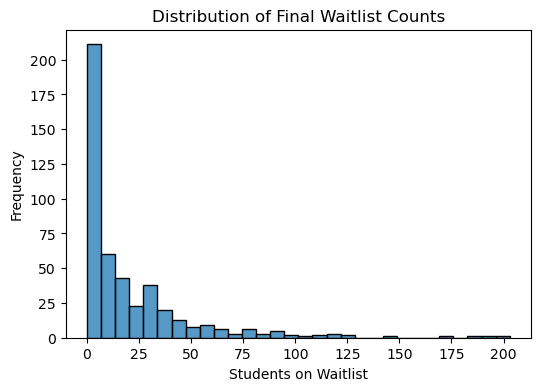

In [87]:
    # 5 (Optional) SUMMARY STATISTICS

    print("\n--- Summary Statistics (Cleaned) ---")
    display(df[['fill_rate_0to12h', 'final_waitlist_count']].describe())
    
    # Quick visual check of the most important metric
    plt.figure(figsize=(6, 4))
    sns.histplot(df['final_waitlist_count'], bins=30, kde=False)
    plt.title('Distribution of Final Waitlist Counts')
    plt.xlabel('Students on Waitlist')
    plt.ylabel('Frequency')
    plt.show()

## Ethics

### A. Data Collection
 - [x] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
    >In this project, an existing publicly available dataset containing aggregated data for course enrollments at UCSD is used. There is no direct interaction with human subjects, so informed consent is not applicable.
- [x] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
    >We are also aware of potential biases that are related to course types, departments, terms, and enrollment policies, which may affect the generalizability of the findings. Thus, we are focusing on the COGS (cognitive science) department.
- [x] **A.3 Limit PII exposure**: Limit PII exposure: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
    >The data does not contain personally identifiable information and is aggregated at the course level, so there are no privacy risks. The analysis does not increase the exposure of the data.
- [x] **A.4 Downstream bias mitigation**:Downstream bias mitigation: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?
    >The dataset lacks protected attributes, and as such, it is difficult for us to determine the differential effects on different student groups. We will interpret the results cautiously and avoid making prescriptive claims that could create unintended bias in course planning.

### B. Data Storage
 - [X] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
    > The dataset used in this project is obtained from a publicly available GitHub repository and does not contain private credentials or direct student identifiers. However, the group will still take precautions when handling local copies of the data. Files will be stored on password protected devices and restricted to team members only. The team will avoid linking the dataset with other sources that could increase the risk of reidentification and will not redistribute modified datasets that could introduce new privacy concerns.

 - [X] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
     > The dataset used in this project contains only aggregated course information (e.g., time stamps, number enrolled, seats available, and waitlist counts) and does not include any personally identifiable information. As a result, individuals cannot be identified from the data, and the risk of personal data exposure is minimal. The group does not control the original public dataset hosted on GitHub; however, if any privacy concerns were raised or if personally identifiable information were later discovered, the team would remove the affected records from all local copies and exclude them from further analysis.

 - [X] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?

    > The research team will retain local copies of the publicly available, aggregate enrollment dataset obtained from GitHub only for the duration of the course project and grading period. After the project is complete, all local raw data files will be deleted from personal devices and shared storage locations. Only summary statistics, figures, and trained model outputs that do not contain raw time-series records will be preserved for documentation purposes. Any backups containing the raw dataset will also be removed according to this schedule.
    
### C. Analysis
 - [X] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
    > "Our analysis uses only course-level seat and waitlist data and does not capture individual student experiences, motivations, or constraints (e.g., enrollment time, major requirements). We therefore interpret results as system-level patterns rather than claims about student intent."
 - [X] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
    > "We focus on repeatedly offered, high-demand STEM courses, which introduces selection bias. Our conclusions will be limited to similar competitive courses and not generalized to all university classes."
 - [X] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to represent the underlying data honestly?
    > "We will clearly document preprocessing steps and avoid misleading visualizations or cherry-picked examples, reporting trends across many course offerings."
 - [X] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
   > " The dataset does not contain any personally identifiable information (PII). It consists only of course-level seat counts, waitlist counts, timestamps, and instructor names as publicly displayed on WebReg. No student identities, grades, or personal records are used in this analysis."
 - [X] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?
   > " All data processing and modeling steps will be implemented in documented, reproducible notebooks using a publicly available dataset."

### D. Modeling
  - [X] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?

    > There is a risk that the model could pick up on student biases against instructors of certain genders, ethnicities, or backgrounds by the instructor column, like predicting lower waitlists for female instructors in STEM fields. 

 - [x] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?

    > The model may perform unevenly across different subjects, defined by the (subj_course_id). It might be highly accurate for large, predictable majors like CSE or Biology, but fail for smaller departments where waitlist behavior is erratic, resulting in higher error rates for students in smaller majors. We could evaluate the mean absolute error separately for different departments.

 - [x] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?

    > Our current metric is accuracy, but this might not leave the room for underestimates, since it might cause students to not get into classes. So, we should consider a metric that avoids underestimation more than overestimation, as it is the worse outcome for the students.

 - [x] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?

    > Our approach is to prioritize interpretable insights for students, so if the model predicts a massive waitlist, we should be able to explain why, like "This course filled 50% of its (total_seats) in the first 10 minutes, which historically leads to a high waitlist."

 - [x] **D.5 Communicate limitations**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?

    > Our plan is to clearly state that this model is a prediction, and not a guarantee by specifying that the dataset cannot account for sudden administrative changes, like sudden 20 seats openings in Week 2. We would explicitely state these limitations to the stakeholders.

### E. Deployment
 - [ ] **E.1 Monitoring and evaluation**: Do we have a clear plan to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?
 - [X] **E.2 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
    > If the analysis leads to misleading or biased conclusions that negatively affect course planning, the analysis should be re-examined and revised. This may include adjusting assumptions, incorporating additional variables, or clearly communicating uncertainty to prevent repeated harm.

 - [X] **E.3 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
    > If the predictive relationship no longer holds or produces unreliable results, the use of this analysis should be paused or discontinued until it is revalidated. Rolling back to alternative or descriptive approaches would help avoid reinforcing incorrect decisions.
 - [X] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?
    > The results of this project may be misused if interpreted as measures of course quality or instructor performance. To reduce this risk the intended scope and limitations of the analysis should be clearly stated, emphasizing that it is meant for aggregate-level planning rather than individual evaluation.

## Team Expectations 

* *Team Expectation 1* - Accountability and Shared Responsibility: It is expected that all team members are responsible for their designated tasks and ensure they are completed on time and to the best of their ability. Tasks will be assigned according to votes on a first come first serve basis. While there are specific tasks for each team member, there is also an understanding that the final product is a shared responsibility, and all team members are expected to contribute to the team's success.

* *Team Expectation 2* - Consistent and Respectful Communication: Our team will communicate regularly throughout the quarter using a consistent means of communication, such as through Instagram and iMessage. We will make every effort to reply within a timely manner. We plan to meet weekly over Zoom and in person if required. We will also respect each individual’s communication style and provide feedback constructively.

* *Team Expecation 3* - Collaboration, Inclusion, and Mutual Respect: We believe that every member of the team has valuable ideas and skills to bring to the table. We will strive to create an environment where everyone feels comfortable contributing. We will use majority vote to make decisions for our project and respect the final choice. We are committed to respecting each other’s work styles and schedules.

* *Team Expectation 4* - Conflict Resolution: In the event that conflicts or disagreements arise, we will resolve the issues immediately, rather than letting the problem escalate. We will trust that all individuals have good intentions and will listen to each other’s views and opinions, with the goal of resolving the problem. If we are unable to resolve the problem, we will seek advice from the course staff early on to maintain a productive and respectful working environment.

## Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/6  |  3 PM | Conduct preliminary data inspection (reviewing structure, missing values, and data types)  | Reviewing datasets and all the progress that made before the meeting | 
| 2/13  |  3 PM | Address missing values, outliers, and inconsistent data types; Document all cleaning steps and decisions in the notebook; Confirm the dataset is fully clean and ready for analysis | Revise and clarify data cleaning explanations | 
| 2/20  | 3 PM  | Create at least three appropriate data visualizations; Use suitable plot types and clearly labeled axes; Interpret each visualization in the notebook text  | Conduct Exploratory Data Analysis (EDA) to identify key patterns; Evaluate whether EDA findings align with the original hypothesis   |
| 2/27  | 3 PM  | Perform the main Data Analysis; Apply appropriate analytical methods to answer the research question; Interpret analysis results and assess hypothesis support  |  Draft the Overview section (3–4 sentences)   |
| 3/6  | 3 PM  | Write Privacy and Ethics Considerations; Address potential bias, ethical concerns, and responsible data use; Complete Conclusion & Discussion; Clearly answer the research question  | Discuss limitations of the analysis; Prepare and record the Final Video (3–5 minutes); Ensure the question, methods, results, and takeaway are clear|
| 3/13  | 3 PM  | Conduct Final Checks; Remove all instructions; Ensure all text and visuals display correctly; Include all group members’ names; Rename the final notebook| Discuss/edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |